<a href="https://colab.research.google.com/github/YogeeshaBayari/AI-ML-Lab/blob/main/LWR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

In [ ]:
def localWeight(point, xmat, ymat, k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

In [ ]:
def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

In [ ]:
def graphPlot(X,y_pred):
    sortindex = X[:,1].argsort(0)
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],y_pred[sortindex], color = 'red', linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show()

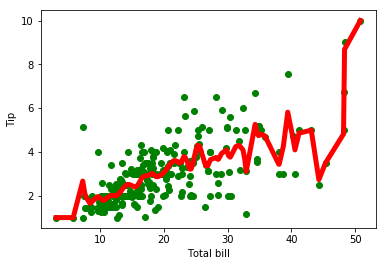

In [ ]:
# load data points
data = pd.read_csv('bill.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))
y_pred = localWeightRegression(X,mtip,0.5)
graphPlot(X,y_pred)